You are working as a data analyst for a yatch and boat sales website. The marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed to help sellers to get more views of their boat and stay on top of market trends. 

They would like you to take a look at the recent data and get some insights. The possible questions that we can ask ourselves is:

1. Characteristics of the most viewed boat listings in the last 7 days  
2. Is it the most expensive boats that get the most views?  
3. Are there common features among the most viewed boats?

(Demonstrate the above with numbers and visualization)

In [2]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Load the dataset
df = pd.read_csv(r'Documents\boat_data.csv')

In [4]:
# Display five observation of the dataset
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


With just a quick look, it's evident that there are NaN values present in the Material column. Let's ensure that this isn't the situation for the remaining columns. -->

# Exploratory Data Analysis

In [5]:
# view the shape of the dataset 
df.shape

(9888, 10)

In [6]:
# view the columns of the dataset
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [7]:
# perform a descriptive analysis
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


In [8]:
# view the general features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [9]:
# return a boolean value for any column having NaN values
df.isna().any()

Price                          False
Boat Type                      False
Manufacturer                    True
Type                            True
Year Built                     False
Length                          True
Width                           True
Material                        True
Location                        True
Number of views last 7 days    False
dtype: bool

In [10]:
# view the counts of NaN values in a column
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

 A significant amount of data appears to be missing across six columns. We can address this by filling in some of the missing values, specifically in the Length and Width columns. To do so, we have the option to use the mean, median, or mode. However, before making a decision, let's examine the distribution of these columns.

In [11]:
df[df.duplicated()].shape

(0, 10)

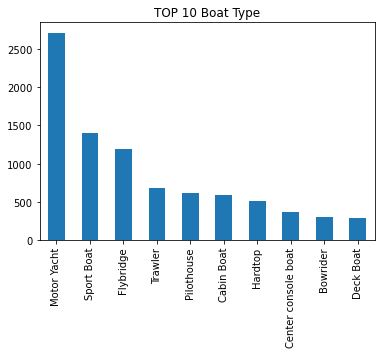

In [12]:
df['Boat Type'].value_counts().head(10).plot(kind='bar', title='TOP 10 Boat Type')
plt.show()

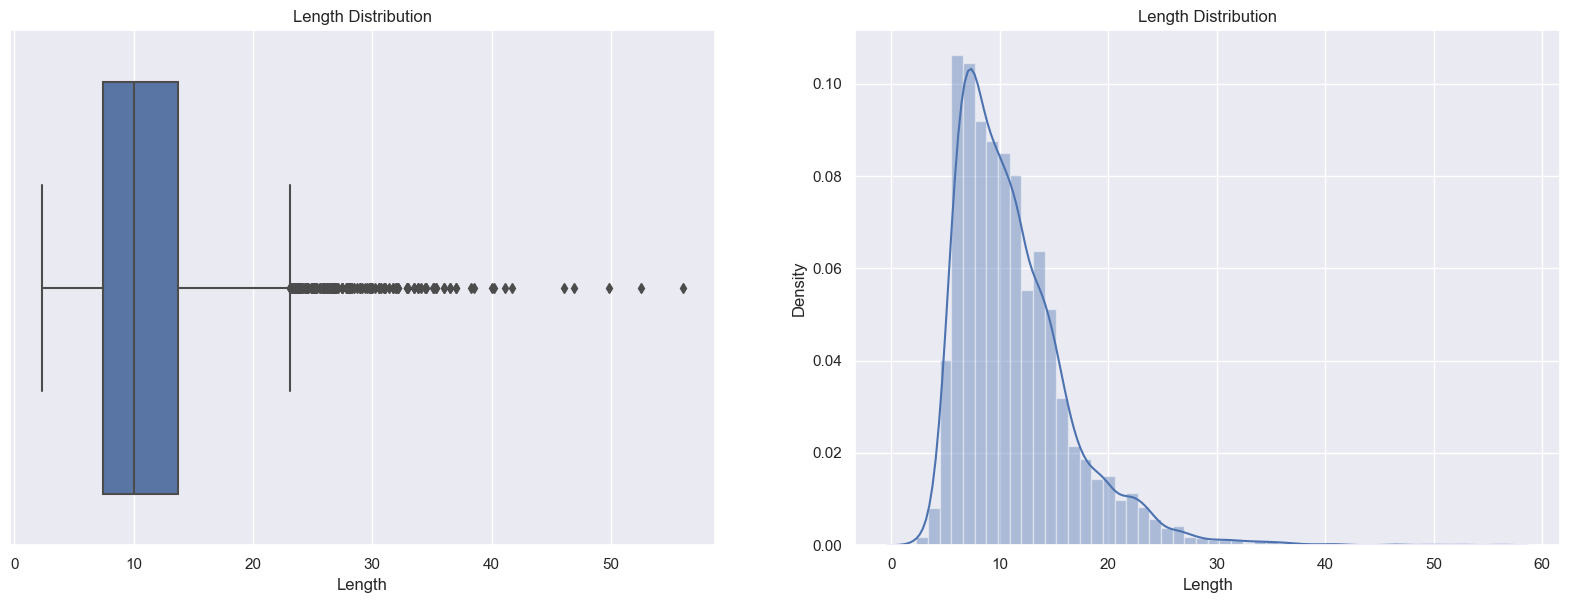

In [33]:
fig = plt.figure(figsize=(20,15), dpi=100)
ax1 = fig.add_subplot(223)
sns.boxplot(df.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df.Length)
ax2.set_title("Length Distribution")
plt.savefig('heightDistributions.png')

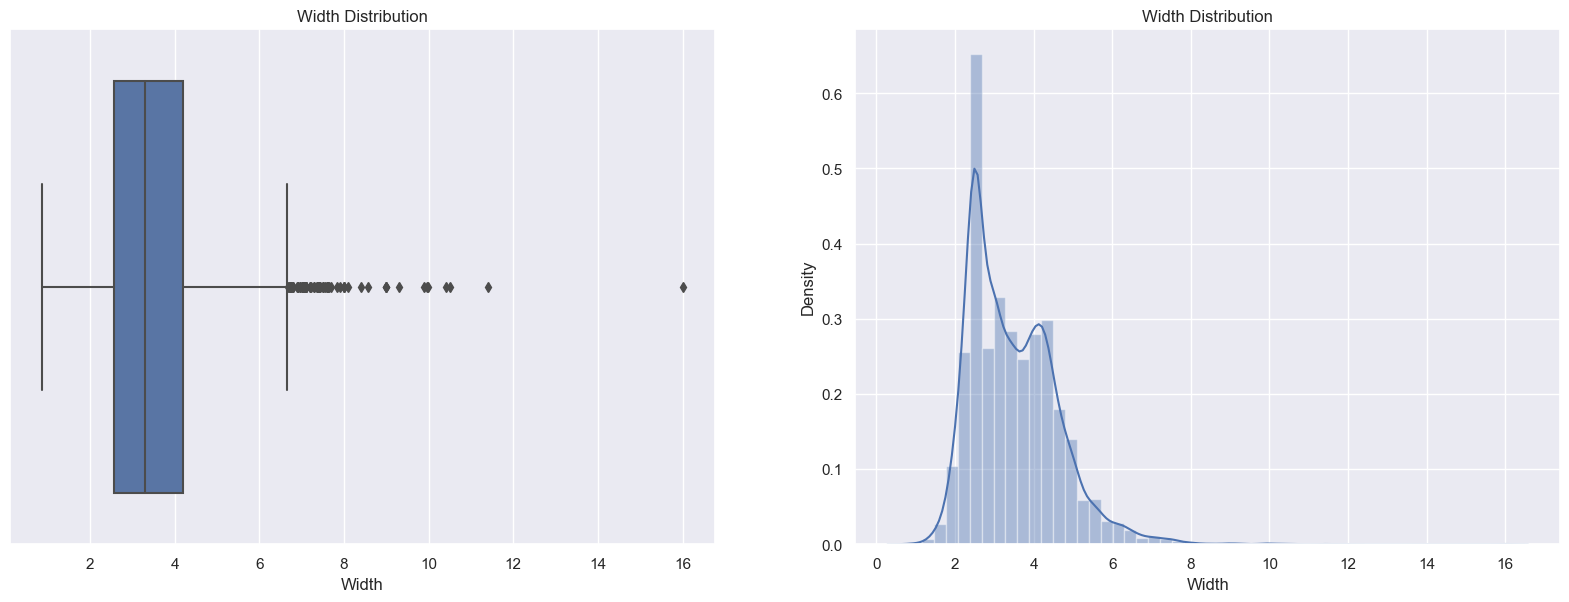

In [31]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20,15), dpi=100)
ax1 = fig.add_subplot(223)
sns.boxplot(df.Width)
ax1.set_title("Width Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df.Width)
ax2.set_title("Width Distribution")
plt.savefig('weightDistributions.png')

Outliers are present in this column, and if we opt for the mean, it will undeniably skew the average. Therefore, I believe it's wiser to choose the median as a more suitable option.

The situation is analogous in the weights column. We will simply populate the missing data with the median since there are numerous data points that can be classified as outliers.

In [15]:
df['Length'] = df['Length'].fillna(df['Length'].median())

In [16]:
df['Width'] = df['Width'].fillna(df['Width'].median())

In [17]:
# lets get the details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9888 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [18]:
# We have to drop all the null values
df = df.dropna()

In [19]:
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

In [32]:
df['Currency'] = df.loc[:,'Price'].str.slice(0,3)
df['Price'] = df['Price'].str.replace(r'[A-Z\D\W]', '')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,349
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,339
10,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,350
12,3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,350
13,4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113,460


In [21]:
# #lets drop the years with 0
df = df[df['Year Built']!=0]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6607 entries, 1 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        6607 non-null   object 
 1   Boat Type                    6607 non-null   object 
 2   Manufacturer                 6607 non-null   object 
 3   Type                         6607 non-null   object 
 4   Year Built                   6607 non-null   int64  
 5   Length                       6607 non-null   float64
 6   Width                        6607 non-null   float64
 7   Material                     6607 non-null   object 
 8   Location                     6607 non-null   object 
 9   Number of views last 7 days  6607 non-null   int64  
 10  Currency                     6607 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 619.4+ KB


In [23]:
# view the entries of the currency column
df['Currency'].unique()

array(['EUR', 'CHF', 'DKK', 'Â£ '], dtype=object)

### Question:
### Is it the most expensive boats that get the most views?

In [24]:
most_viewed_boat = df[df['Number of views last 7 days'] > 700].sort_values('Number of views last 7 days', ascending=False)

In [25]:
most_viewed_boat

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
9580,14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263,CHF
8723,35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland Â» Neuenburgersee Â» Hauterive,2432,CHF
6211,125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland Â» Lago Maggiore Â» 6600 Locarno,2261,CHF
3700,949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),2154,EUR
308,19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland Â» Murtensee Â» Avenches,2026,CHF
...,...,...,...,...,...,...,...,...,...,...,...
1627,95500,Motor Yacht,Glastron power boats,"Used boat,Unleaded",2016,7.67,2.55,GRP,Switzerland Â» Lake Constance Â» Romanshorn,711,CHF
9409,19000,Bowrider,Larson power boats,"Used boat,Unleaded",1998,6.07,2.47,GRP,Switzerland Â» Lake Geneva Â» Port de Founex,709,CHF
7838,56500,Cabin Boat,Rinker power boats,"Used boat,Unleaded",2008,7.47,2.59,GRP,Switzerland Â» Lake Geneva Â» Morges,708,CHF
8736,35000,Motor Yacht,Sunseeker power boats,Used boat,1990,9.42,3.30,GRP,Switzerland Â» Ermatingen,706,CHF


The above are the top 10 most viewd boats. If we look at the price column we can see that its price is not the highest, meaning that it doesn't have to be expensive to get more views. Like lets take the 3rd boat from the table it's price is 125900 which is more that the 1st boat in the table.

#### Question:

#### Characteristics of the most viewed boat listings in the last 7 days

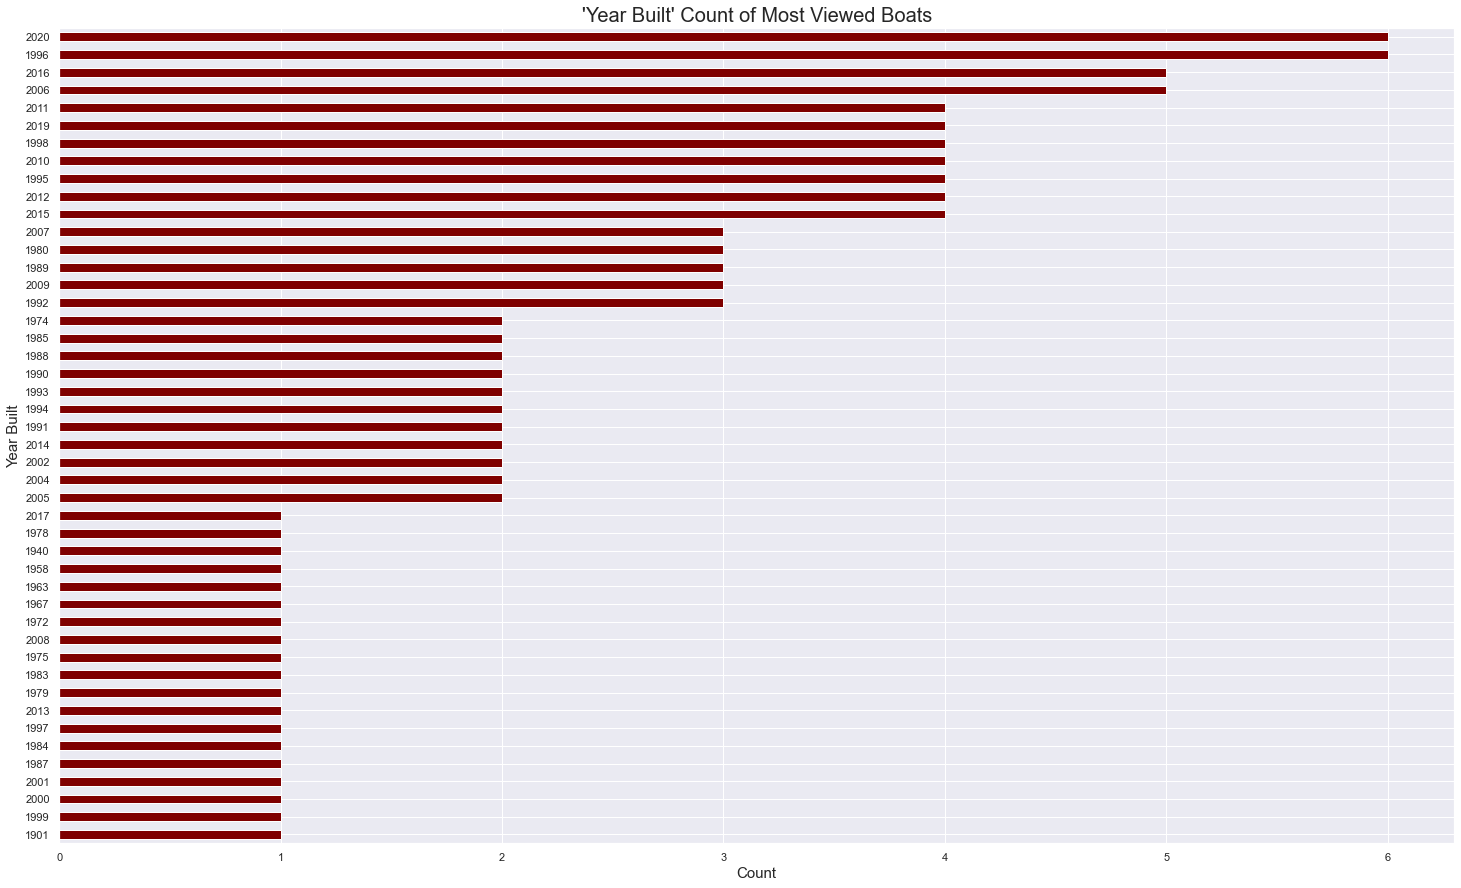

In [26]:
# view year of manufacture of the most_viewed boats, Materials used
sns.set()
fig = plt.figure(figsize=(25, 15))
year = most_viewed_boat.groupby('Year Built').size().sort_values(ascending=True)
g = year.plot(kind='barh',colormap='OrRd_r',edgecolor='white')
plt.xlabel("Count", size=15)
plt.ylabel('Year Built', size=15)
plt.title("'Year Built' Count of Most Viewed Boats", size=20);

plt.savefig('YearBuilt_Material.png');

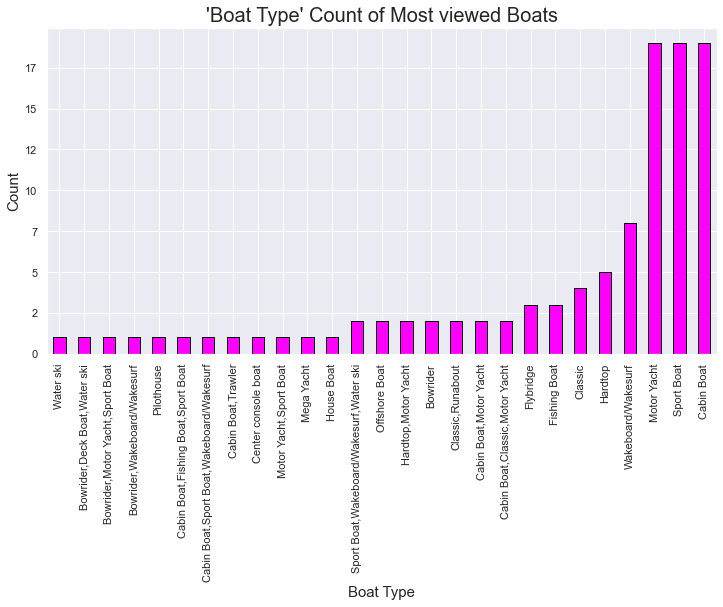

In [27]:
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(12,6))
btype = most_viewed_boat.groupby('Boat Type').size().sort_values(ascending=True)
g = btype.plot(kind='bar',colormap='cool_r', edgecolor='black')
g.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plt.xlabel("Boat Type", size=15)
plt.ylabel("Count", size=15)
plt.title("'Boat Type' Count of Most viewed Boats", size=20)
plt.savefig('Boattype(most_viewed).png')
plt.show();

##### Motor Yacht, Sport Boat and Cabin Boat are the most popular type of boat With this we can be sure that those 3 types are the popular ones.

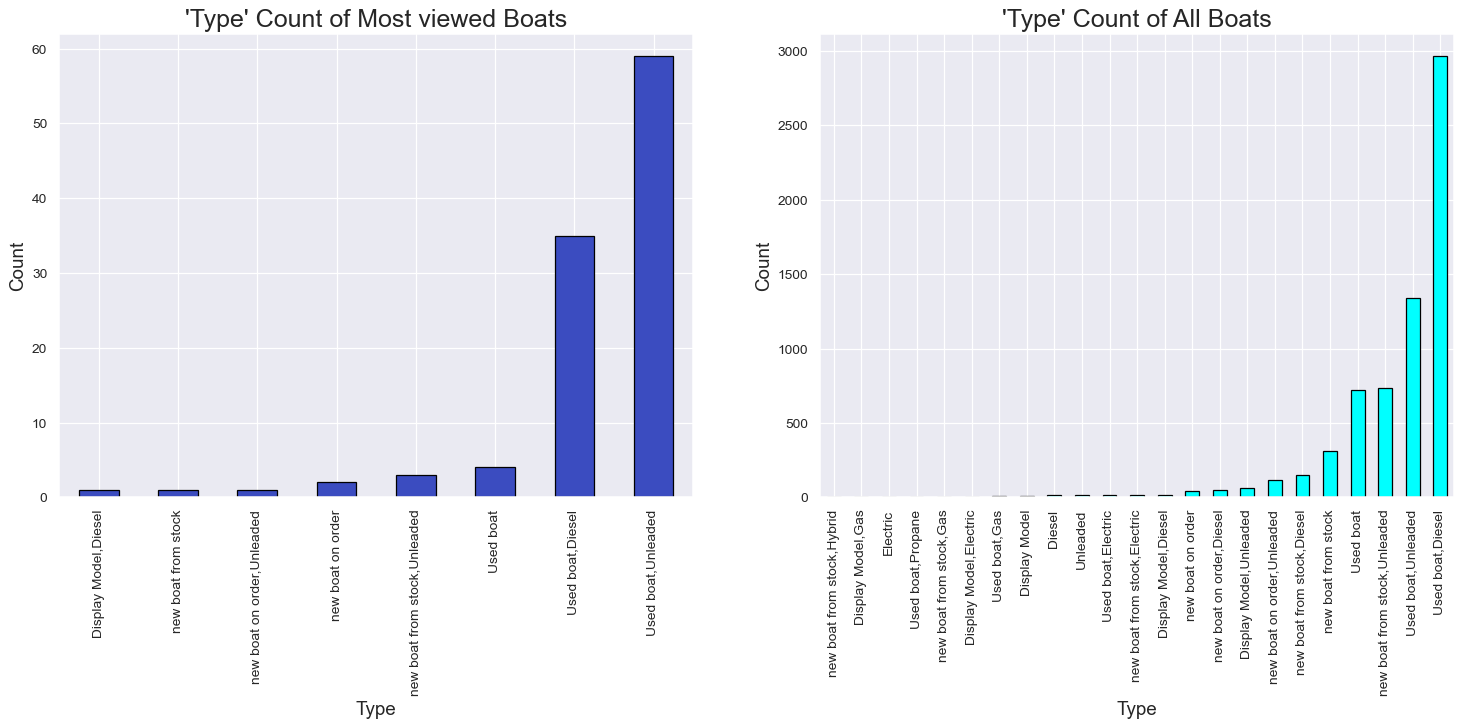

In [28]:
fig = plt.figure(figsize=(20,15),dpi=90)
sns.set(font_scale=1)
types = most_viewed_boat.groupby('Type').size().sort_values(ascending=True)
ax1 = fig.add_subplot(223)
types.plot(kind='bar',colormap='coolwarm',edgecolor='black',ax=ax1)
ax1.set_xlabel("Type", size=15)
ax1.set_ylabel("Count", size=15)
ax1.set_title("'Type' Count of Most viewed Boats", size=20)

types_o = df.groupby('Type').size().sort_values(ascending=True)
ax2 = fig.add_subplot(224)
types_o.plot(kind='bar',colormap='cool',edgecolor='black',ax=ax2)
ax2.set_xlabel("Type", size=15)
ax2.set_ylabel("Count", size=15)
ax2.set_title("'Type' Count of All Boats", size=20)
plt.savefig('Type.png')
plt.show();

# Manufacturer Feature -->

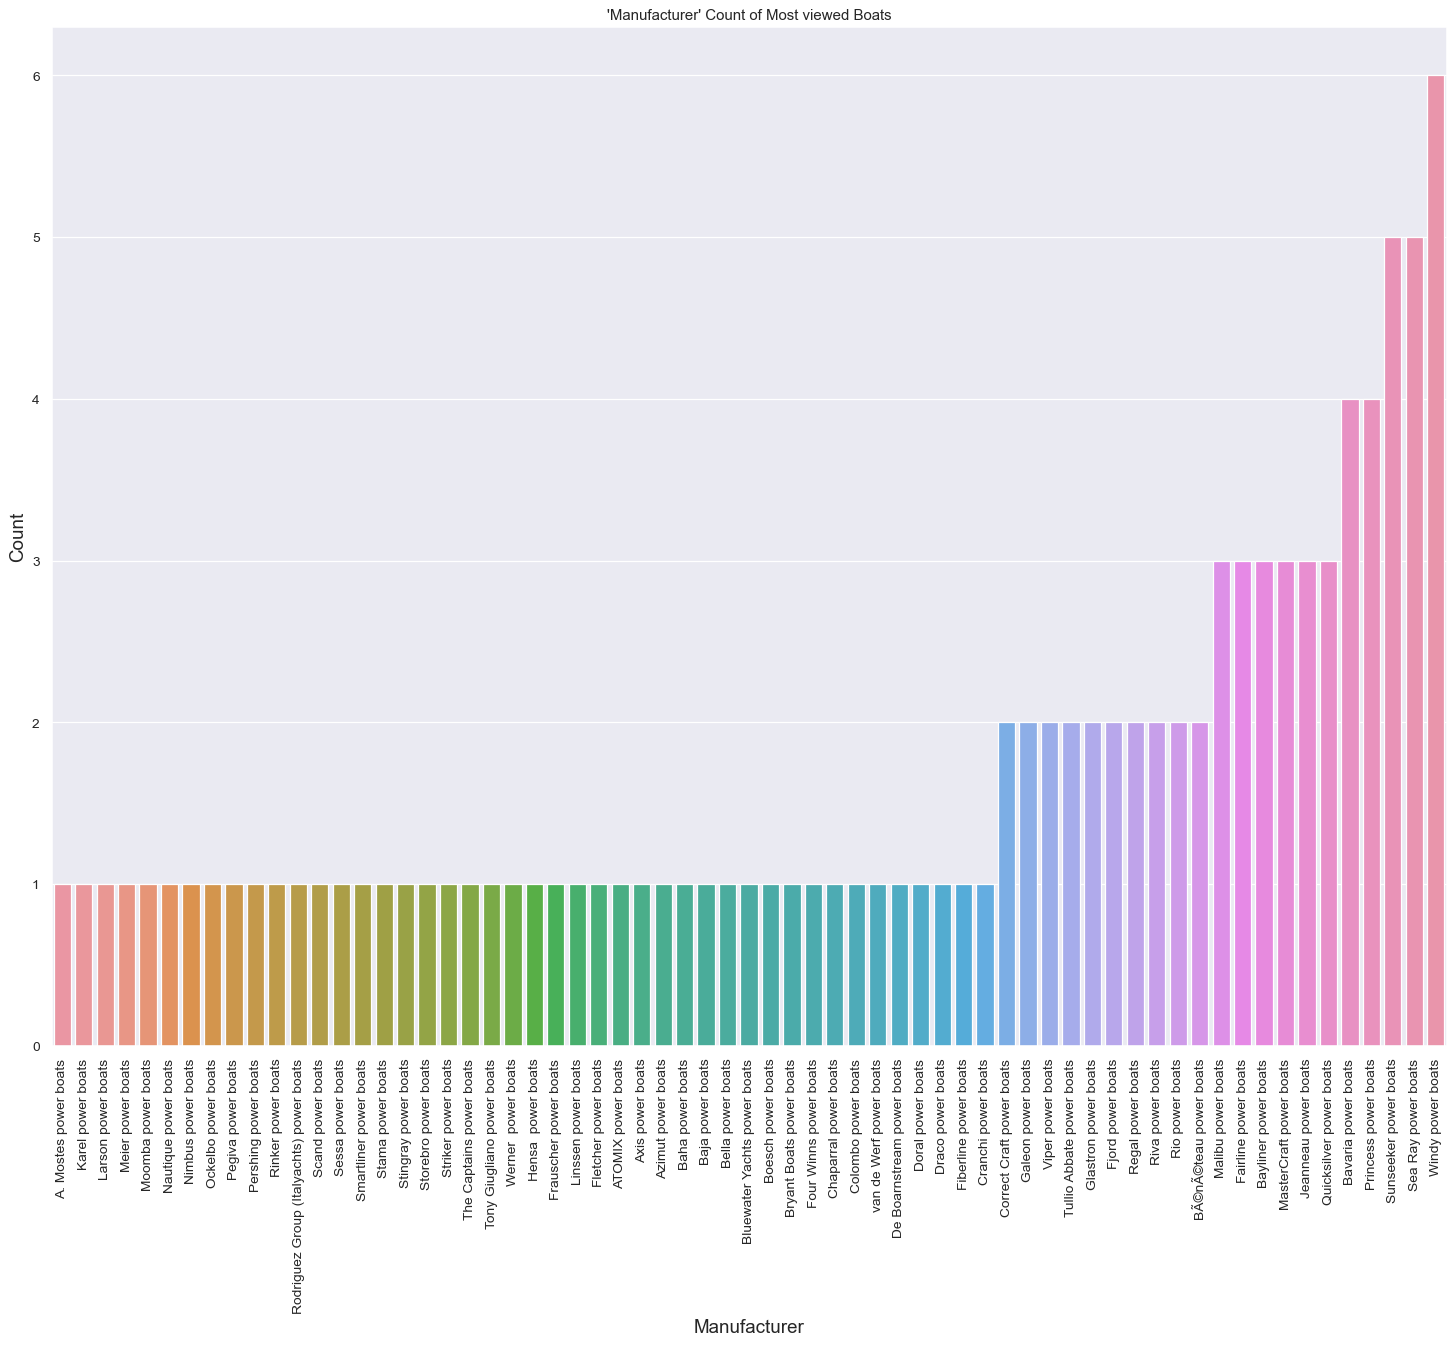

In [29]:
plt.figure(figsize=(20,15),dpi=90)
man = most_viewed_boat.groupby('Manufacturer').size().sort_values(ascending=True).reset_index()
man = pd.DataFrame(man)
man.columns = ['Manufacturer','Count']
sns.barplot(x='Manufacturer',y='Count', data=man)
plt.xlabel('Manufacturer', size=15)
plt.ylabel('Count', size=15)
plt.title("'Manufacturer' Count of Most viewed Boats")
plt.xticks(rotation=90);

# Length and width feature

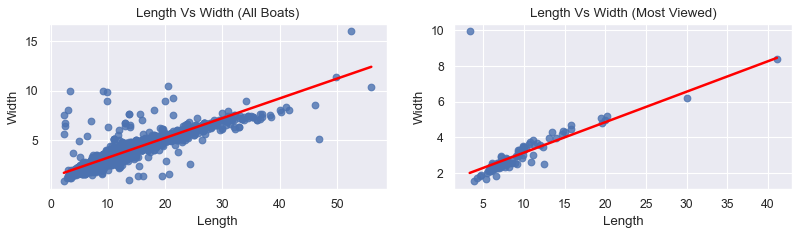

In [30]:
fig = plt.figure(figsize=(12,6),dpi=80)
ax1 = fig.add_subplot(223)
sns.regplot(x='Length', y='Width', data=df, line_kws={"color": "red"}, ci=None, ax=ax1)
ax1.set_title('Length Vs Width (All Boats)')

ax2 = fig.add_subplot(224)
sns.regplot(x='Length', y='Width', data=most_viewed_boat, line_kws={'color': 'red'}, ci=None, x_jitter=0.1,ax=ax2)
ax2.set_title('Length Vs Width (Most Viewed)')
plt.savefig('LengthVsWidth.png')

Based on the Regplot depicted above, it's evident that as the Length increases, the Width also shows an increase. This suggests a positive correlation between the two attributes. However, it's important to note that this correlation does not imply a causal relationship where Length directly causes an increase in Width.

# Findings and Insight

1. Characteristics of the most viewed boat listings in the last 7 days? 

- They can or cannot have high prices, as from the above analysis, price is not a factor on the views a boat gets. Along with that there are all the other factors such as 'Type': most of the boats are Used and are Unleaded.

2. Is it the most expensive boats that get the most views?  

- Definitely not, as we've seen earlier, the price of the boat has nothing to do with the popularity it gets. The most viewed boat was not that expensive compared to other entries in the data set.  

3. Are there common features among the most viewed boats?  

- Yes there are some common features. For example, most of the popular boats had 'GRP' as their build material. Also they are Unused Boats, Unleaded.